In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [117]:
def binomial(n,k):
    assert(n >= k)
    if (n == 1 or n == 0):
        return 1
    else:
        return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [118]:
# testing the function
#triviale fälle
binomial(1,1) # d/o = 1
binomial(0,0) # d/o = 1
binomial(12,4) # desired output == 495
binomial(24,4) # desired output == 10626

10626.0

In [119]:
def binomialverteilung(n,k,pi):
    assert(0 <= pi <= 1)
    binm = binomial(n,k)
    return binm*pi**k*(1-pi)**(n-k)

<b>Beispiel Binomialverteilung</b>
<br><ul>
    <li>$\pi$ = $0.3$</li>
    <li>$n$ = $3$, $n$ $\in$ $N$</li>
    <li>$x$ $\in$ $X$, $X$ $:=$ $Anzahl\,der\,guenstigen\,Ereignisse$ 

In [151]:
# let x be vector as x = (0,1,2,3)
# run loop for each x_i in x
x_vector = [0,1,2,3]
p_x = []
for x in range(len(x_vector)):
    p_x_i = binomialverteilung(3,x,0)
    p_x.append(p_x_i)
p_x

[1.0, 0.0, 0.0, 0.0]

In [152]:
p_von_X = pd.Series(p_x)
p_von_X

0    1.0
1    0.0
2    0.0
3    0.0
dtype: float64

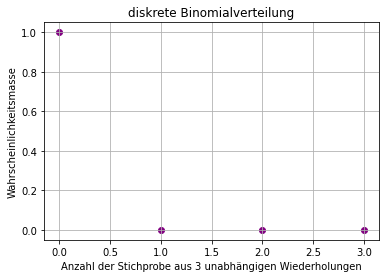

In [153]:
plt.scatter(x_vector,p_von_X, c="purple")
plt.title("diskrete Binomialverteilung")
plt.grid("True")
plt.xlabel("Anzahl der Stichprobe aus 3 unabhängigen Wiederholungen")
plt.ylabel("Wahrscheinlichkeitsmasse")
plt.show()

## Hypergeometrische Verteilung

In [154]:
mu = 5.0
sigma = 175.0
N = 1000

In [155]:
s = np.random.normal(mu, sigma, N)

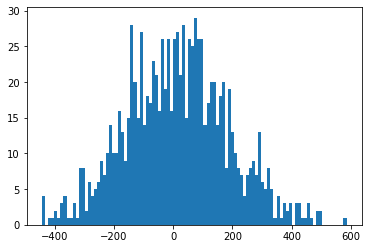

In [156]:
syn_height = pd.Series(s)
plt.hist(norm_distribution,bins=100)
plt.show()

In [157]:
syn_height.describe()

count    1000.000000
mean        4.588626
std       171.492365
min      -511.135112
25%      -114.642376
50%         3.237118
75%       115.290269
max       692.317407
dtype: float64

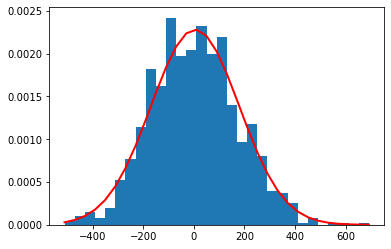

In [158]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

In [245]:
# set parameteres
T = 365
rho = 0.5
sigma_e = 20.0
iniVal = 0.0
np.random.seed(12345)

# generate process
SynAR1 = pd.Series(iniVal)
for d in range(1,T):
    SynAR1[d] = (rho*SynAR1[d-1]) + random.gauss(0.0,sigma_e)

SynAR1.index = pd.date_range(start="01/01/2021", end="31/12/2021", freq="D")
SynAR1

2021-01-01     0.000000
2021-01-02     3.222700
2021-01-03    27.791729
2021-01-04    29.950441
2021-01-05    50.322356
                ...    
2021-12-27    17.097900
2021-12-28     1.045255
2021-12-29   -23.604402
2021-12-30    -9.566846
2021-12-31   -41.630350
Freq: D, Length: 365, dtype: float64

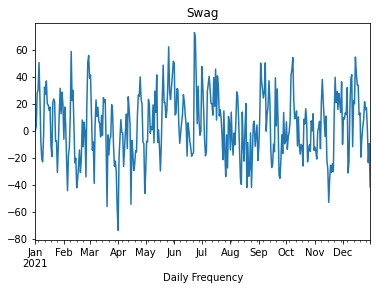

In [246]:
SynAR1.plot()
plt.title("Swag")
plt.xlabel('Daily Frequency')
plt.show()

In [252]:
UnemploymentRate = pd.read_excel('eurostat2.xlsx', skiprows=12, index_col=0)
UnemploymentRate = UnemploymentRate.T
UnemploymentRate.replace(':', np.NaN)

12,13,14,15,16,17,18,19,20,21,22,...,37,38,39,40,41,42,43,44,45,46
GEO/TIME,Belgium,Bulgaria,Czech Republic,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,...,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Montenegro,"Former Yugoslav Republic of Macedonia, the",Turkey
2,2021-01-08 00:00:00,10.0,2021-01-07 00:00:00,2021-05-07 00:00:00,7.0,2021-03-18 00:00:00,2021-06-14 00:00:00,12.0,2021-09-19 00:00:00,2021-06-08 00:00:00,...,2021-04-14 00:00:00,2021-06-09 00:00:00,2021-05-09 00:00:00,2021-07-07 00:00:00,2021-08-08 00:00:00,2021-08-03 00:00:00,2021-07-04 00:00:00,NaN,32.1,2021-09-09 00:00:00
3,2021-07-08 00:00:00,2021-06-09 00:00:00,2021-01-07 00:00:00,2021-03-07 00:00:00,2021-06-06 00:00:00,2021-04-15 00:00:00,2021-09-14 00:00:00,2021-06-12 00:00:00,2021-06-19 00:00:00,2021-03-08 00:00:00,...,2021-01-14 00:00:00,2021-03-07 00:00:00,8.0,2021-09-07 00:00:00,2021-05-06 00:00:00,2021-04-03 00:00:00,5.0,NaN,2021-07-31 00:00:00,2021-02-10 00:00:00
4,2021-09-07 00:00:00,2021-04-11 00:00:00,2021-09-06 00:00:00,2021-03-07 00:00:00,2021-04-06 00:00:00,2021-06-13 00:00:00,2021-01-15 00:00:00,2021-05-14 00:00:00,2021-01-20 00:00:00,2021-01-09 00:00:00,...,2021-09-13 00:00:00,2021-04-07 00:00:00,2021-06-07 00:00:00,2021-07-07 00:00:00,2021-04-07 00:00:00,2021-02-03 00:00:00,2021-03-04 00:00:00,NaN,31.0,2021-08-09 00:00:00
5,2021-02-07 00:00:00,2021-02-12 00:00:00,2021-02-07 00:00:00,2021-01-08 00:00:00,2021-06-06 00:00:00,2021-03-14 00:00:00,15.0,2021-01-16 00:00:00,2021-01-21 00:00:00,2021-02-09 00:00:00,...,14.0,2021-06-08 00:00:00,2021-03-08 00:00:00,2021-07-07 00:00:00,2021-08-07 00:00:00,2021-02-03 00:00:00,2021-07-04 00:00:00,2021-02-21 00:00:00,31.2,2021-04-10 00:00:00
6,2021-06-06 00:00:00,2021-02-11 00:00:00,2021-07-06 00:00:00,2021-03-07 00:00:00,2021-08-05 00:00:00,13.0,2021-03-15 00:00:00,2021-05-16 00:00:00,2021-07-20 00:00:00,2021-04-08 00:00:00,...,2021-02-13 00:00:00,2021-08-08 00:00:00,2021-06-08 00:00:00,2021-08-07 00:00:00,2021-04-08 00:00:00,2021-05-03 00:00:00,2021-09-03 00:00:00,2021-09-19 00:00:00,31.4,2021-06-08 00:00:00
7,2021-08-07 00:00:00,2021-03-10 00:00:00,2021-05-06 00:00:00,2021-05-07 00:00:00,2021-07-05 00:00:00,2021-07-10 00:00:00,2021-09-15 00:00:00,18.0,2021-03-21 00:00:00,2021-03-08 00:00:00,...,2021-02-13 00:00:00,2021-08-06 00:00:00,2021-01-07 00:00:00,2021-05-08 00:00:00,2021-09-05 00:00:00,2021-01-03 00:00:00,2021-06-04 00:00:00,2021-05-19 00:00:00,31.2,2021-03-08 00:00:00
8,2021-01-07 00:00:00,2021-04-11 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-03-05 00:00:00,2021-03-11 00:00:00,2021-03-15 00:00:00,21.0,2021-06-22 00:00:00,2021-03-09 00:00:00,...,2021-01-14 00:00:00,2021-09-06 00:00:00,2021-02-07 00:00:00,2021-02-08 00:00:00,6.0,3.0,2021-04-04 00:00:00,2021-01-18 00:00:00,2021-08-31 00:00:00,2021-01-08 00:00:00
9,2021-02-07 00:00:00,2021-09-12 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-08-05 00:00:00,2021-03-11 00:00:00,2021-08-15 00:00:00,2021-09-22 00:00:00,2021-02-24 00:00:00,2021-06-09 00:00:00,...,2021-01-14 00:00:00,8.0,2021-02-08 00:00:00,2021-02-08 00:00:00,2021-09-06 00:00:00,2021-02-03 00:00:00,2021-06-04 00:00:00,2021-08-20 00:00:00,31.6,2021-04-09 00:00:00
10,7.0,2021-03-12 00:00:00,2021-07-06 00:00:00,2021-08-07 00:00:00,2021-03-05 00:00:00,2021-01-10 00:00:00,2021-09-15 00:00:00,2021-08-23 00:00:00,2021-04-24 00:00:00,9.0,...,2021-06-13 00:00:00,2021-06-08 00:00:00,2021-06-08 00:00:00,2021-08-07 00:00:00,2021-03-07 00:00:00,2021-02-03 00:00:00,2021-01-04 00:00:00,20.0,2021-03-31 00:00:00,2021-03-07 00:00:00


In [263]:
UnemploymentRate.columns.name = 'Countries'
UnemploymentRate

Countries,13,14,15,16,17,18,19,20,21,22,...,37,38,39,40,41,42,43,44,45,46
GEO/TIME,Belgium,Bulgaria,Czech Republic,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,...,Slovakia,Finland,Sweden,United Kingdom,Iceland,Norway,Switzerland,Montenegro,"Former Yugoslav Republic of Macedonia, the",Turkey
2,2021-01-08 00:00:00,10.0,2021-01-07 00:00:00,2021-05-07 00:00:00,7.0,2021-03-18 00:00:00,2021-06-14 00:00:00,12.0,2021-09-19 00:00:00,2021-06-08 00:00:00,...,2021-04-14 00:00:00,2021-06-09 00:00:00,2021-05-09 00:00:00,2021-07-07 00:00:00,2021-08-08 00:00:00,2021-08-03 00:00:00,2021-07-04 00:00:00,:,32.1,2021-09-09 00:00:00
3,2021-07-08 00:00:00,2021-06-09 00:00:00,2021-01-07 00:00:00,2021-03-07 00:00:00,2021-06-06 00:00:00,2021-04-15 00:00:00,2021-09-14 00:00:00,2021-06-12 00:00:00,2021-06-19 00:00:00,2021-03-08 00:00:00,...,2021-01-14 00:00:00,2021-03-07 00:00:00,8.0,2021-09-07 00:00:00,2021-05-06 00:00:00,2021-04-03 00:00:00,5.0,:,2021-07-31 00:00:00,2021-02-10 00:00:00
4,2021-09-07 00:00:00,2021-04-11 00:00:00,2021-09-06 00:00:00,2021-03-07 00:00:00,2021-04-06 00:00:00,2021-06-13 00:00:00,2021-01-15 00:00:00,2021-05-14 00:00:00,2021-01-20 00:00:00,2021-01-09 00:00:00,...,2021-09-13 00:00:00,2021-04-07 00:00:00,2021-06-07 00:00:00,2021-07-07 00:00:00,2021-04-07 00:00:00,2021-02-03 00:00:00,2021-03-04 00:00:00,:,31.0,2021-08-09 00:00:00
5,2021-02-07 00:00:00,2021-02-12 00:00:00,2021-02-07 00:00:00,2021-01-08 00:00:00,2021-06-06 00:00:00,2021-03-14 00:00:00,15.0,2021-01-16 00:00:00,2021-01-21 00:00:00,2021-02-09 00:00:00,...,14.0,2021-06-08 00:00:00,2021-03-08 00:00:00,2021-07-07 00:00:00,2021-08-07 00:00:00,2021-02-03 00:00:00,2021-07-04 00:00:00,2021-02-21 00:00:00,31.2,2021-04-10 00:00:00
6,2021-06-06 00:00:00,2021-02-11 00:00:00,2021-07-06 00:00:00,2021-03-07 00:00:00,2021-08-05 00:00:00,13.0,2021-03-15 00:00:00,2021-05-16 00:00:00,2021-07-20 00:00:00,2021-04-08 00:00:00,...,2021-02-13 00:00:00,2021-08-08 00:00:00,2021-06-08 00:00:00,2021-08-07 00:00:00,2021-04-08 00:00:00,2021-05-03 00:00:00,2021-09-03 00:00:00,2021-09-19 00:00:00,31.4,2021-06-08 00:00:00
7,2021-08-07 00:00:00,2021-03-10 00:00:00,2021-05-06 00:00:00,2021-05-07 00:00:00,2021-07-05 00:00:00,2021-07-10 00:00:00,2021-09-15 00:00:00,18.0,2021-03-21 00:00:00,2021-03-08 00:00:00,...,2021-02-13 00:00:00,2021-08-06 00:00:00,2021-01-07 00:00:00,2021-05-08 00:00:00,2021-09-05 00:00:00,2021-01-03 00:00:00,2021-06-04 00:00:00,2021-05-19 00:00:00,31.2,2021-03-08 00:00:00
8,2021-01-07 00:00:00,2021-04-11 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-03-05 00:00:00,2021-03-11 00:00:00,2021-03-15 00:00:00,21.0,2021-06-22 00:00:00,2021-03-09 00:00:00,...,2021-01-14 00:00:00,2021-09-06 00:00:00,2021-02-07 00:00:00,2021-02-08 00:00:00,6.0,3.0,2021-04-04 00:00:00,2021-01-18 00:00:00,2021-08-31 00:00:00,2021-01-08 00:00:00
9,2021-02-07 00:00:00,2021-09-12 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-08-05 00:00:00,2021-03-11 00:00:00,2021-08-15 00:00:00,2021-09-22 00:00:00,2021-02-24 00:00:00,2021-06-09 00:00:00,...,2021-01-14 00:00:00,8.0,2021-02-08 00:00:00,2021-02-08 00:00:00,2021-09-06 00:00:00,2021-02-03 00:00:00,2021-06-04 00:00:00,2021-08-20 00:00:00,31.6,2021-04-09 00:00:00
10,7.0,2021-03-12 00:00:00,2021-07-06 00:00:00,2021-08-07 00:00:00,2021-03-05 00:00:00,2021-01-10 00:00:00,2021-09-15 00:00:00,2021-08-23 00:00:00,2021-04-24 00:00:00,9.0,...,2021-06-13 00:00:00,2021-06-08 00:00:00,2021-06-08 00:00:00,2021-08-07 00:00:00,2021-03-07 00:00:00,2021-02-03 00:00:00,2021-01-04 00:00:00,20.0,2021-03-31 00:00:00,2021-03-07 00:00:00


In [ ]:
UnemploymentRate = UnemploymentRate.rename(columns = )

In [260]:
UnemploymentRate.index

Index(['GEO/TIME',          2,          3,          4,          5,          6,
                7,          8,          9,         10,         11,     '12.1',
               13,         14,         15,         16,         17,         18,
               19,         20,         21,         22,         23,         24,
               25,         26,         27,         28,         29,         30,
               31,         32],
      dtype='object')

In [265]:
UnemploymentRate.index = pd.period_range(start="2010Q2", end="2021Q4",freq="quarterly frequency")

ValueError: Invalid frequency: quarterly frequency

In [262]:
UnemploymentRate['Switzerland'].plot(legend=True)

KeyError: 'Switzerland'